In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
fuel_econ = pd.read_csv('fuel_econ.csv')
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])
fuel_econ.head(3)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic


## 2- Non-Positional Encodings for Third Variables

In [9]:
# We have taken a random subset of 200 cars to reduce over plotting and combine that with a small amount of horizontal jitter
np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 200, replace = False)
fuel_econ_subset = fuel_econ.loc[sample]

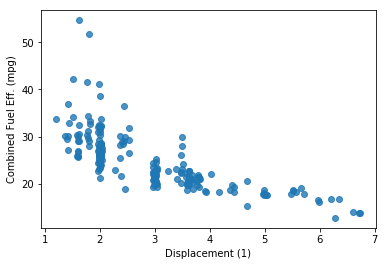

In [10]:
sb.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb',
           x_jitter = 0.04, fit_reg = False);
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

Are there differences between cars with automatic transmission and manual trans in terms of fuel efficiency and engine size?

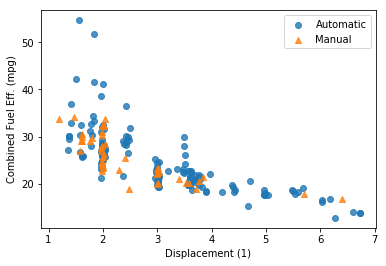

In [13]:
# Since transmission type is categorical, Shape is a Good encoding to use --> use marker, it is take one value so we should
#   create a loop

ttype_markers = [['Automatic', 'o'],
                 ['Manual', '^']]
for ttype, marker in ttype_markers:
    plot_data = fuel_econ_subset.loc[fuel_econ_subset['trans_type'] == ttype]
    sb.regplot(data = plot_data, x = 'displ', y = 'comb',
               x_jitter = 0.04, fit_reg = False, marker = marker);
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.legend(['Automatic', 'Manual']);

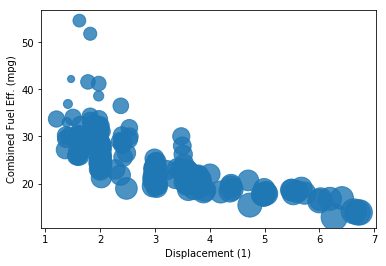

In [14]:
# Another example, Since CO2 is numeric, one encoding we could use is marker size --> use s prameter

sb.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb',
           x_jitter = 0.04, fit_reg = False, #s = 'co2'
           scatter_kws = {'s' : fuel_econ_subset['co2']});
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

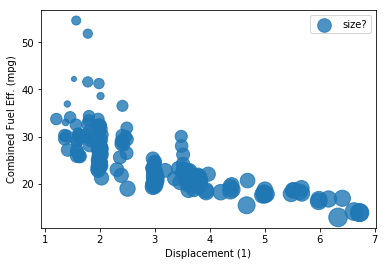

In [17]:
# Reduce the marker size, so we can see more of the points

sb.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb',
           x_jitter = 0.04, fit_reg = False, #s = 'co2'
           scatter_kws = {'s' : fuel_econ_subset['co2']/2});
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.legend(['size?']);

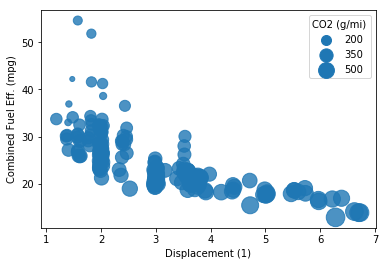

In [19]:
# Solve legend issue

sb.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb',
           x_jitter = 0.04, fit_reg = False, #s = 'co2'
           scatter_kws = {'s' : fuel_econ_subset['co2']/2});
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

sizes = [200, 350, 500]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([],[],s = s/2, color = base_color))
    

plt.legend(legend_obj, sizes, title = 'CO2 (g/mi)');

## 3- Color Palettes

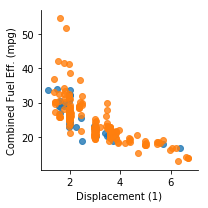

In [24]:

g = sb.FacetGrid(data = fuel_econ_subset, hue = 'trans_type')
g.map(sb.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False);
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

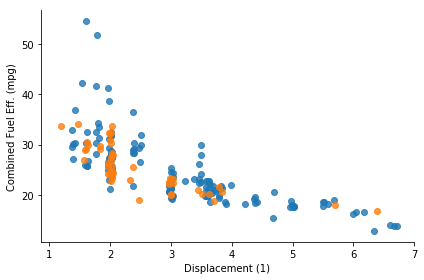

In [27]:
# Let's make a few tweaks to the plot.
# First, let's change the order in which the levels are plotted so that the manual trans points are plotted on the top of auto


g = sb.FacetGrid(data = fuel_econ_subset, hue = 'trans_type',
                 hue_order = ['Automatic', 'Manual'], height = 4, aspect = 1.5)
g.map(sb.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False);
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

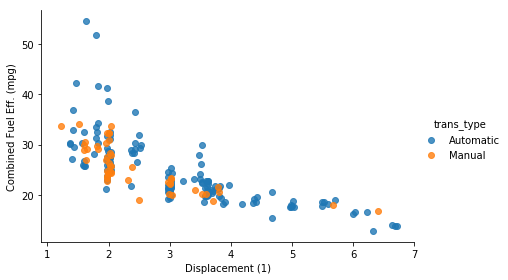

In [28]:
# Finally, let's use the facet grid object method add legend

g = sb.FacetGrid(data = fuel_econ_subset, hue = 'trans_type',
                 hue_order = ['Automatic', 'Manual'], height = 4, aspect = 1.5)
g = g.map(sb.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

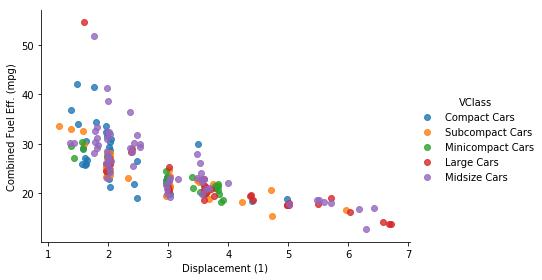

In [29]:
# VClass is an ordered variable, so the qualitative palette doesn't work quite as well

g = sb.FacetGrid(data = fuel_econ_subset, hue = 'VClass',
                 height = 4, aspect = 1.5)
g = g.map(sb.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

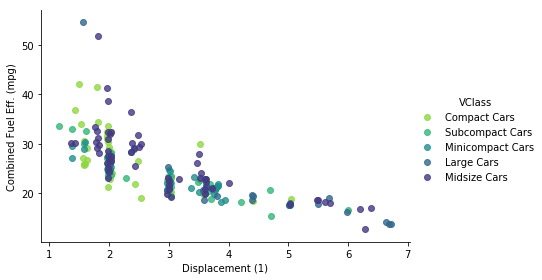

In [30]:
# VClass is an ordered variable, so the qualitative palette doesn't work quite as well
# We should specify a sequential palette instead
g = sb.FacetGrid(data = fuel_econ_subset, hue = 'VClass',
                 height = 4, aspect = 1.5, palette = 'viridis_r')
g = g.map(sb.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

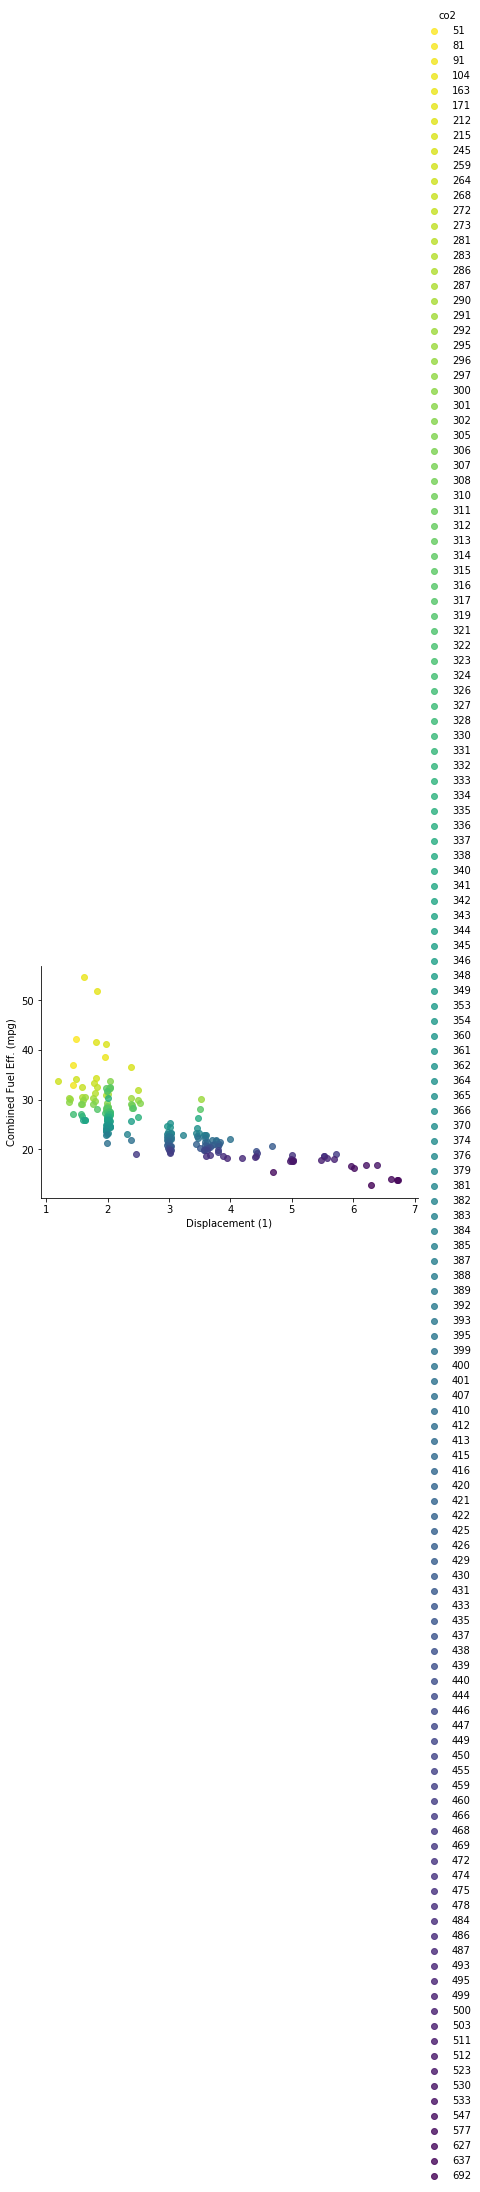

In [32]:
# What if we have a numeric variable instead, like CO2 emissions?

g = sb.FacetGrid(data = fuel_econ_subset, hue = 'co2',
                 height = 4, aspect = 1.5, palette = 'viridis_r')
g = g.map(sb.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

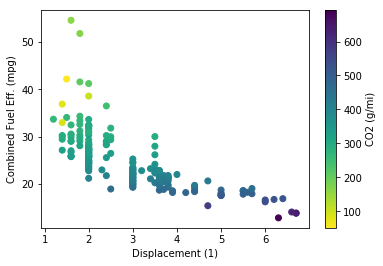

In [34]:
plt.scatter(data = fuel_econ_subset, x = 'displ', y = 'comb' , c = 'co2', cmap = 'viridis_r')
plt.colorbar(label = 'CO2 (g/mi)')
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');